# INTRODUCTION
---
* This notebook was my attempt to re-implement principal component analysis to solidify my understanding of the topic. My interest in the topic was motivated by its potential application in fluid dynamics for model order reduction as well as its usual application in machine learning.

* Matt Brems has done an excellent job of explaining the topic in a very accessible way. The reader can refer to his post by following this [link.](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) 

* I also consulted the implementation by Sebastian Raschka, which is available [here](https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html). You may find it more straight forward to understand.

* The data used in the analysis is from UCI ML databases, available [here](https://archive.ics.uci.edu/ml/machine-learning-databases)

* Initially, numpy linear algebra libraries are used to conduct the principal component analysis. These results are then compared to the results obtained from Sci-Kit Learn builtin function for principal component analysis. 

# IMPORT REQUIRED MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler as scaler
from sklearn.decomposition import PCA as pca

# IMPORT DATA

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width','class']
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# CHECK FOR MISSING VALUES

In [3]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

# EXTRACT INPUTS & LABELS

In [4]:
# Extract inputs
X = df.drop('class', axis=1)

# Extract labels
y = df['class'].values

# SCALE & STANDARDIZE INPUTS

In [5]:
# scale and standardize inputs
Z = scaler().fit_transform(X)

# means of individual columns
print("Column Means of Scaled Inputs\n%s"%Z.mean(axis=0))

# standard deviations of individual columns
print("Column Standard Deviations of Scaled Inputs\n%s"%Z.std(axis=0))

Column Means of Scaled Inputs
[-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
Column Standard Deviations of Scaled Inputs
[1. 1. 1. 1.]


# COMPUTE THE COVARIANCE MATRIX

In [6]:
# transpose scaled and standardized inputs
ZT = Z.T
print("Shape of Z: %s"%(Z.shape,))
print("Shape of Z transpose: %s"%(ZT.shape,))

# multiply Z-transpose and Z to obtain covariance matrix
cov_mat = np.matmul(ZT,Z)
print("Shape of covariance matrix: %s"%(cov_mat.shape,))
print("Covariance matrix\n %s"%cov_mat)

Shape of Z: (150, 4)
Shape of Z transpose: (4, 150)
Shape of covariance matrix: (4, 4)
Covariance matrix
 [[150.         -16.40538749 130.7631236  122.69304501]
 [-16.40538749 150.         -63.07741446 -53.48161344]
 [130.7631236  -63.07741446 150.         144.41356456]
 [122.69304501 -53.48161344 144.41356456 150.        ]]


# SINGULAR VALUE DECOMPOSITION OF COVARIANCE MATRIX

In [7]:
# singular value decomposition
P, D, P_inv = np.linalg.svd(cov_mat)

# display eigen vectors
print("P\n%s"%P)

# display eigen values
print("D\n%s"%D)

# display inverse of eigen vectors
print("P_inv\n%s"%P_inv)

# Check if the product of matrix of eigen vectors and its inverse gives the identity matrix
print("PP_inv\n%s"%np.matmul(P,P_inv))

P
[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]
D
[436.62271256 138.18313961  22.10299175   3.09115609]
P_inv
[[-0.52237162  0.26335492 -0.58125401 -0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [ 0.72101681 -0.24203288 -0.14089226 -0.6338014 ]
 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]]
PP_inv
[[ 1.00000000e+00  1.11022302e-16  1.94289029e-16  3.05311332e-16]
 [ 5.55111512e-17  1.00000000e+00  2.08166817e-16  1.41379963e-16]
 [ 5.55111512e-17  0.00000000e+00  1.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17 -1.43114687e-16  1.11022302e-16  1.00000000e+00]]


# SORT EIGEN VALUES & VECTORS

In [8]:
# list of tuples containing eigen value - vector pair
eigen_pairs = [(np.abs(D[i]), P[:,i]) for i in range(len(D))]

# sort pairs according to eigen values
eigen_pairs.sort(key = lambda x: x[0], reverse=True)

# confirm sorting was successful
for pair in eigen_pairs:
    print(pair[0])

436.6227125628081
138.18313960608378
22.10299174576431
3.0911560853437847


# COMPUTE EXPLAINED VARIANCE

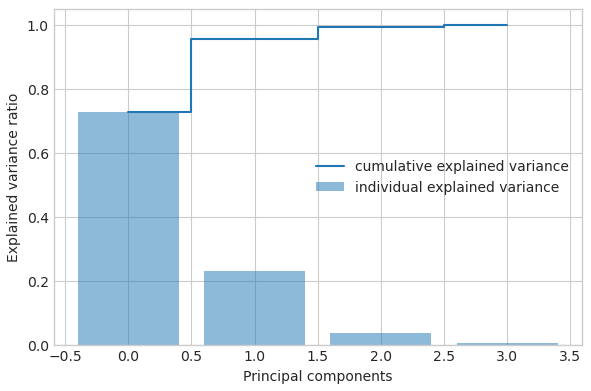

In [9]:
# sum of eigen values
sum_eig_values = sum(D)

# individual proportions of variance explained
var_exp = []

# cumulative proportions of variance explained
cum_var_exp = []
cum_sum = 0.0

# fill lists of individual and cumulative proportions
for pair in eigen_pairs:
    var_exp.append(pair[0]/sum_eig_values)
    cum_sum = cum_sum + pair[0]/sum_eig_values
    cum_var_exp.append(cum_sum)

# plot results
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(4), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

* From above plot, we can drop the last two principal components since they contribute little to explained variance

# COMPUTE PROJECTION MATRIX

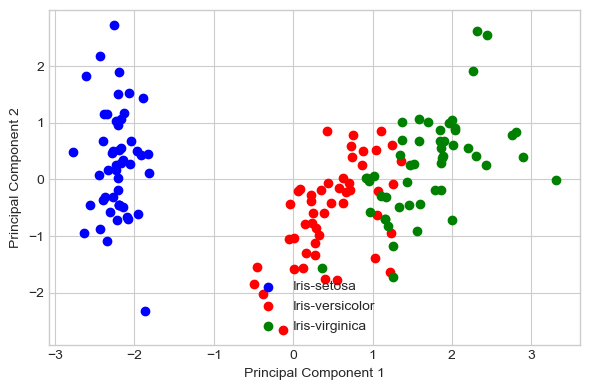

In [10]:
# isolate eigen vectors that contribute significantly to explained variance
P_star = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))

# multiply scaled and standardized input with significant eigen vectors
Z_star = -1.0*Z.dot(P_star)

# plot results
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),('blue', 'red', 'green')):
        plt.scatter(Z_star[y==lab, 0], Z_star[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

# COMPUTE PROJECTION MATRIX WITH SCI-KIT LEARN

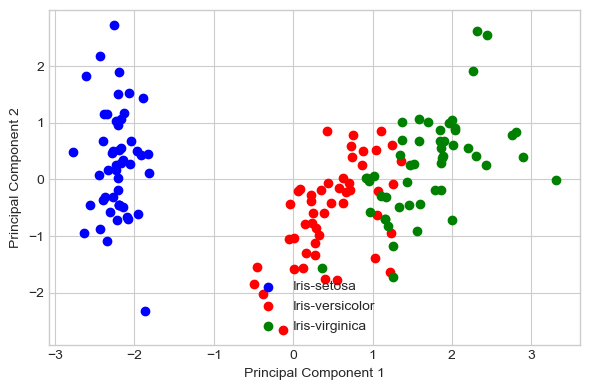

In [11]:
# compute projection matrix
sklearn_pca = pca(n_components=2)
Z_star_sklearn = sklearn_pca.fit_transform(Z)

# display results for visual comparison
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('blue', 'red', 'green')):
        plt.scatter(Z_star_sklearn[y==lab, 0], Z_star_sklearn[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()